In [87]:
# import relevant libraries
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import time # to measure how long the models take
from sklearn import datasets
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV


In [88]:
train = pd.read_csv("/Users/changlu/Downloads/archive (2)/train.csv", delimiter=";")
test = pd.read_csv("/Users/changlu/Downloads/archive (2)/test.csv", delimiter=";")
test


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [89]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [90]:
train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [91]:
test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

no null value we can find here

In [92]:
train_d= train.duplicated().sum()
train_d

0

In [93]:
test_d= test.duplicated().sum()
test_d


0

no duplicate columns found either

In [94]:
train.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [95]:
train['y'].value_counts(normalize=True)

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

In [96]:
df = pd.concat([train, test], axis=0)
df


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49732 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.8+ MB


**Data exploring**

In [98]:
df.replace({'yes': 1, 'no': 0}, inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,0,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,1,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,0,295,0,0,cellular,19,aug,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,0,1137,0,0,cellular,6,feb,129,4,211,3,other,0


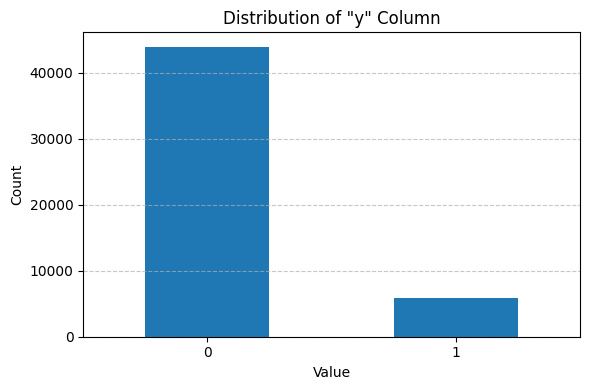

In [99]:
plt.figure(figsize=(6, 4))
df['y'].value_counts().plot(kind='bar')
plt.title('Distribution of "y" Column')
plt.xlabel('Value')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [100]:
Categorical_features = ['job', 'marital', 'education',
                        'default', 'housing', 'loan', 
            'contact', 'month', 'poutcome']

numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [101]:
Categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [102]:
numeric_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

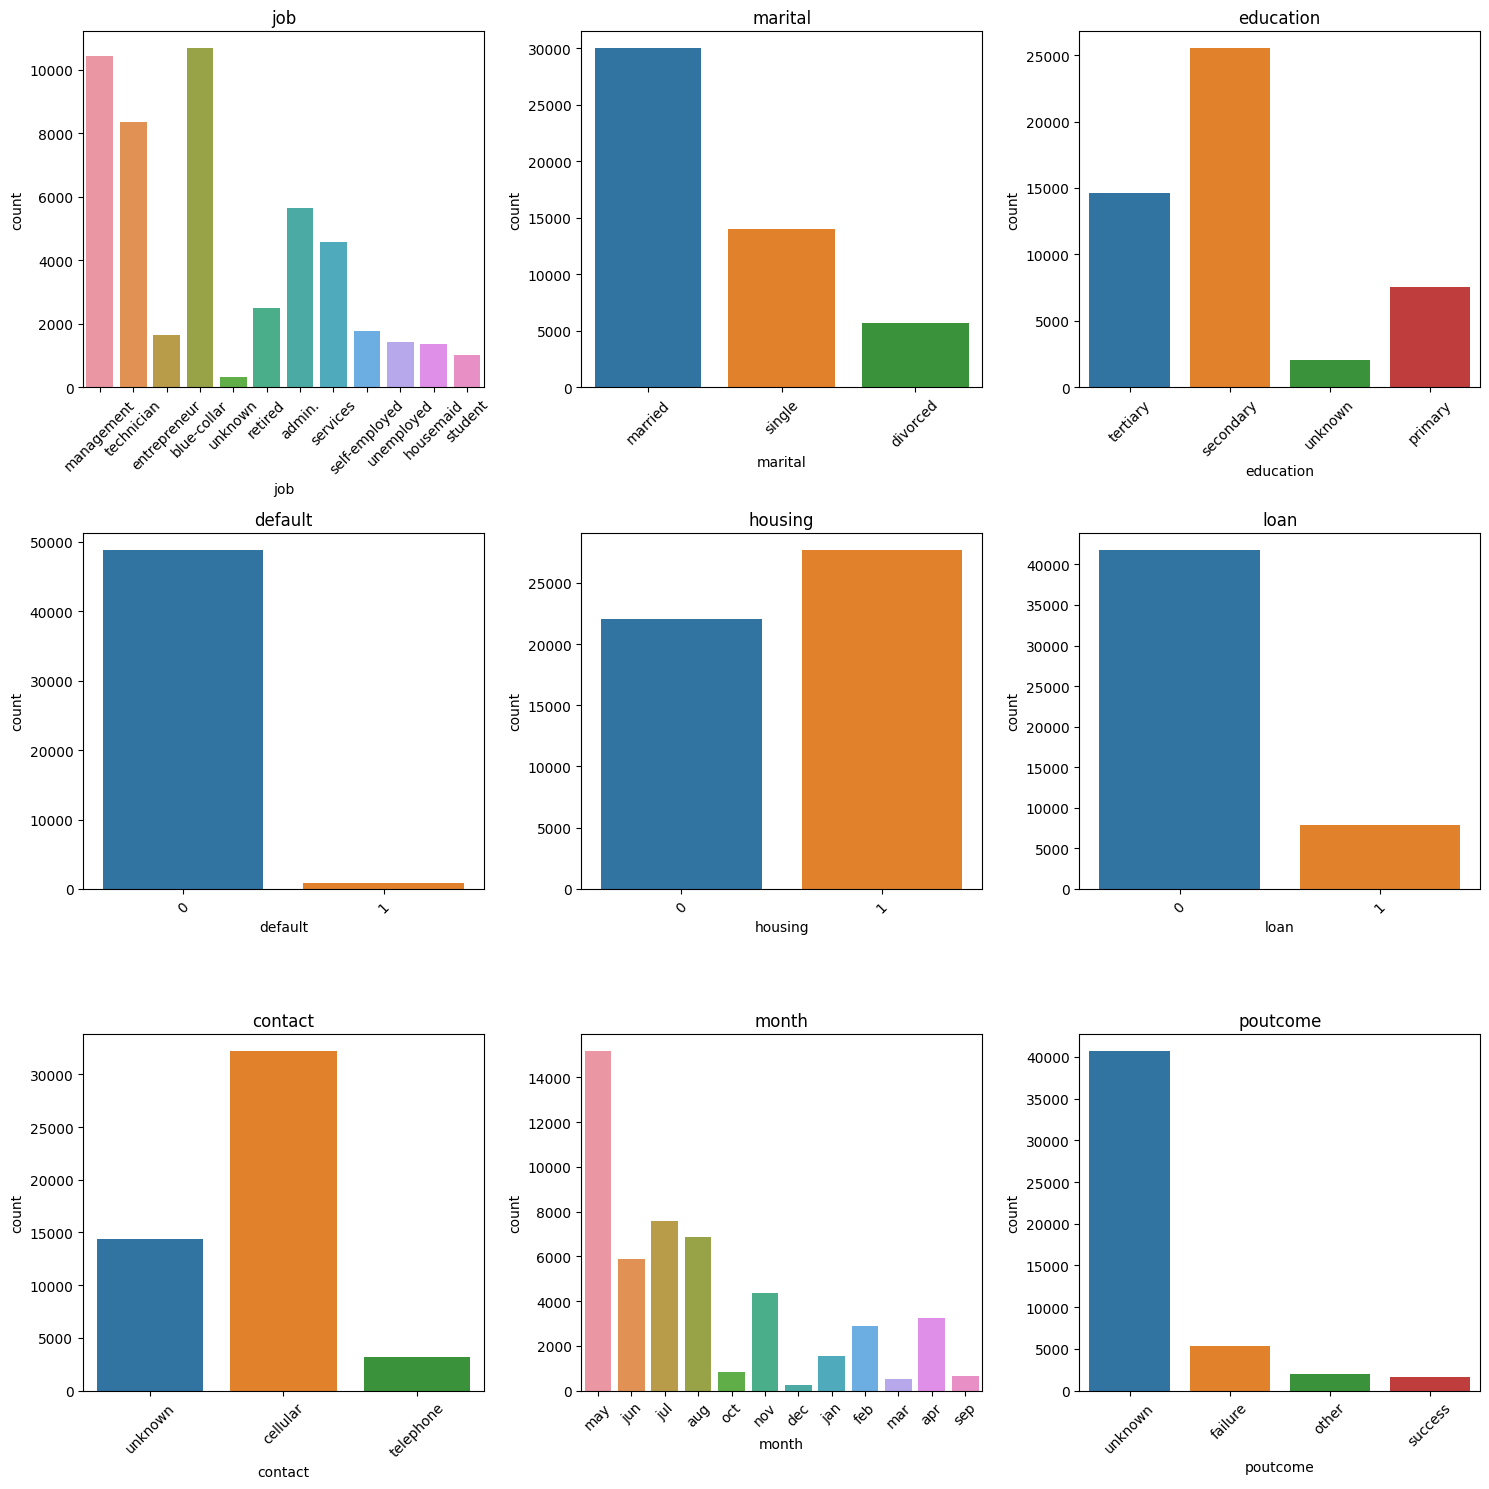

In [103]:
import seaborn as sns

# Set up the figure and axes
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Flatten axes for easy iteration
flat_axs = axs.flatten()

# Iterate over each categorical feature and plot the histogram on the respective axis
for i, feature in enumerate(Categorical_features):
    sns.countplot(data=df, x=feature, ax=flat_axs[i])
    flat_axs[i].set_title(feature)
    flat_axs[i].tick_params(axis='x', rotation=45)

# Adjust the layout
plt.tight_layout()
plt.show()

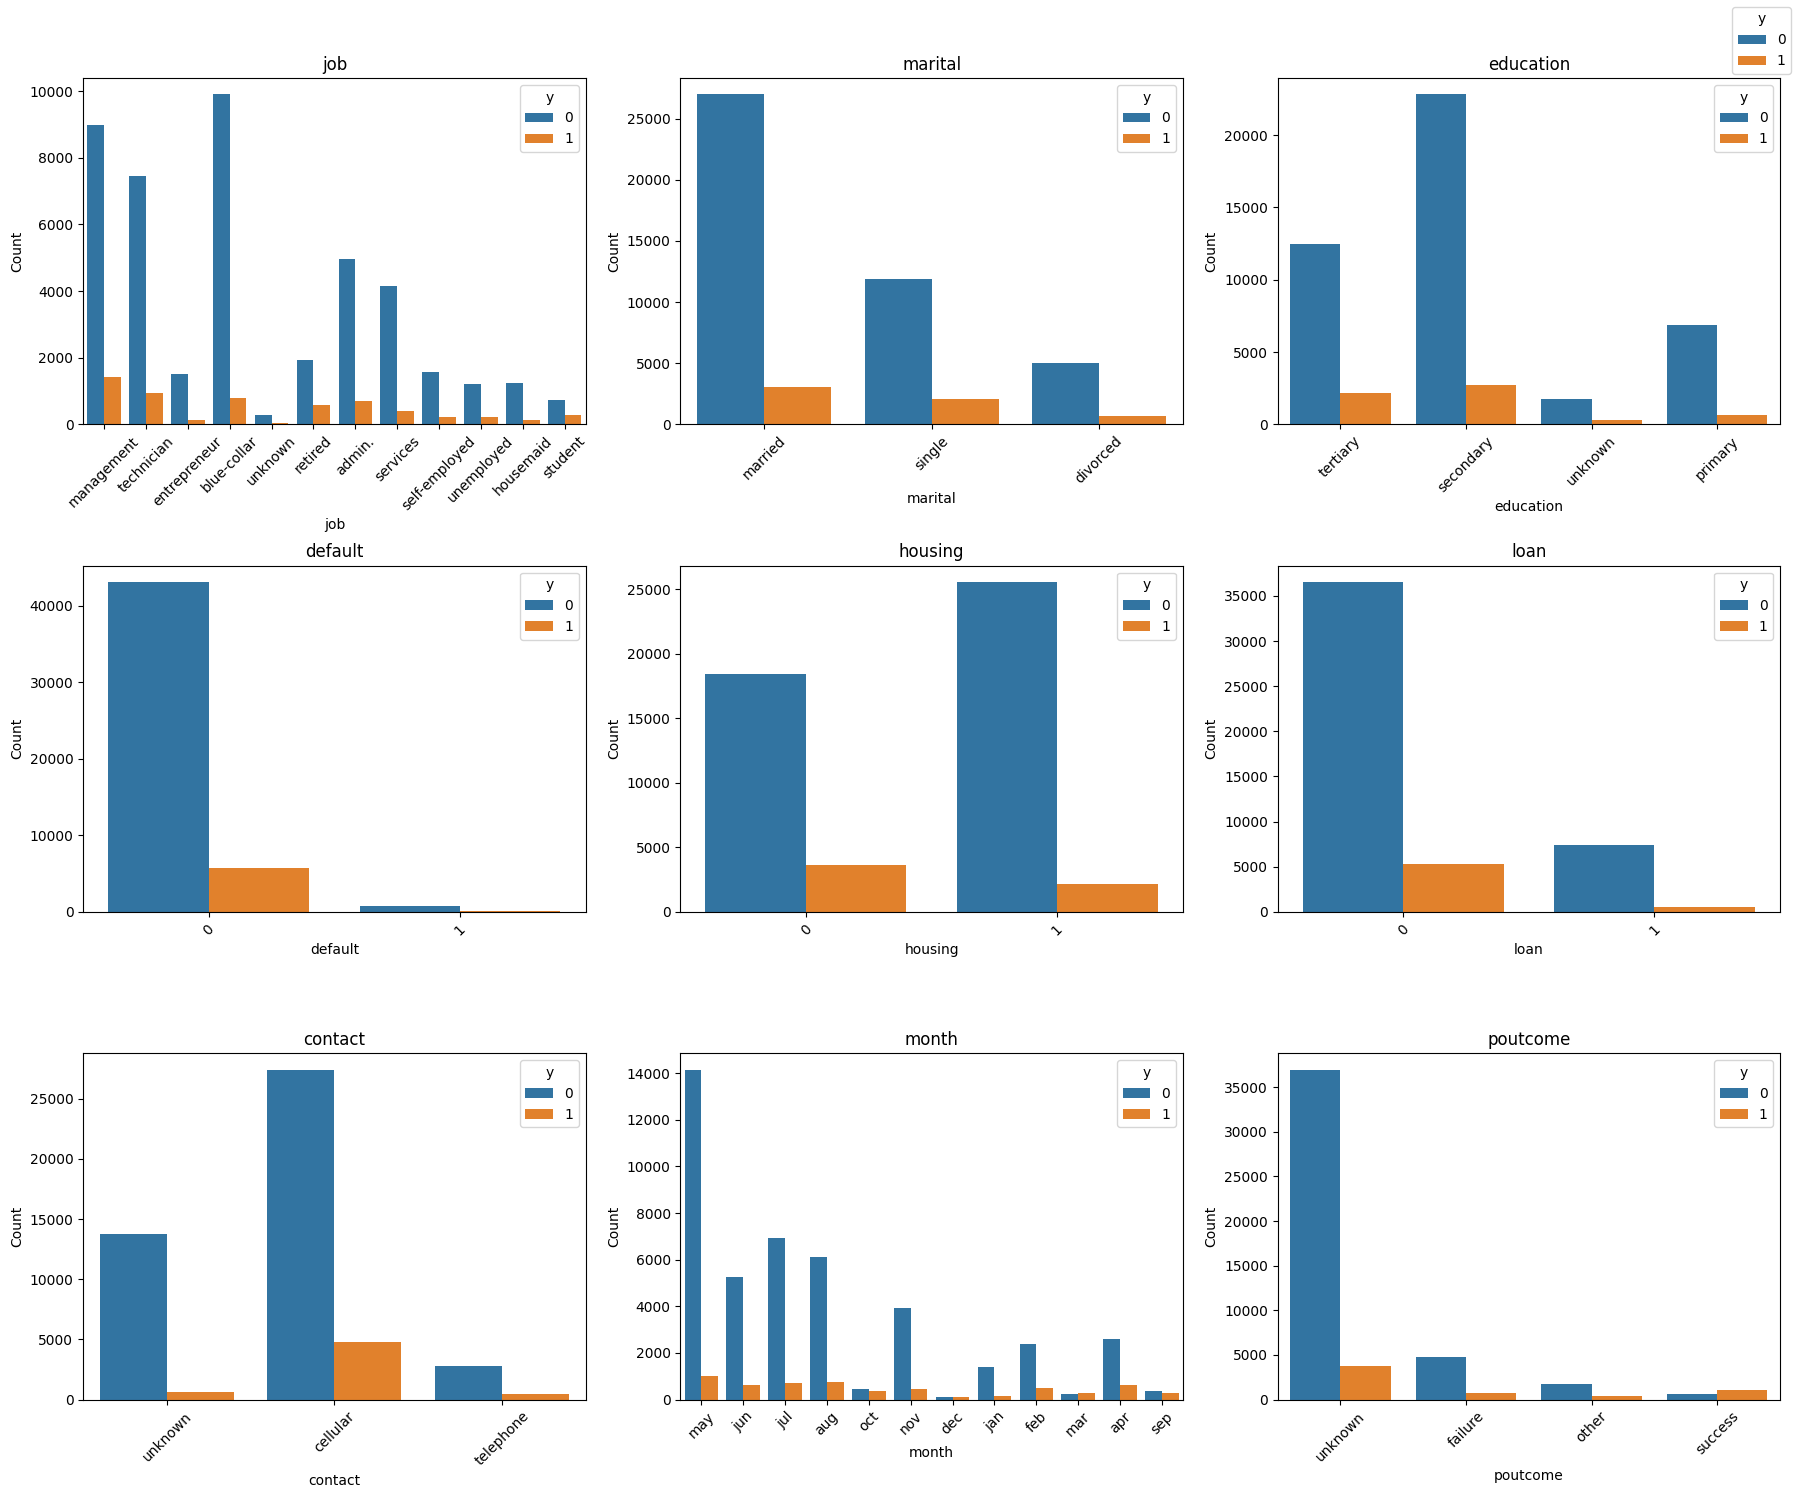

In [104]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
flat_axs = axs.flatten()

for i, feature in enumerate(Categorical_features):
    sns.countplot(data=df, x=feature, hue='y', ax=flat_axs[i])
    flat_axs[i].set_title(feature)
    flat_axs[i].set_ylabel('Count')
    flat_axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
handles, labels = flat_axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', title='y')
plt.subplots_adjust(top=0.95)
plt.show()

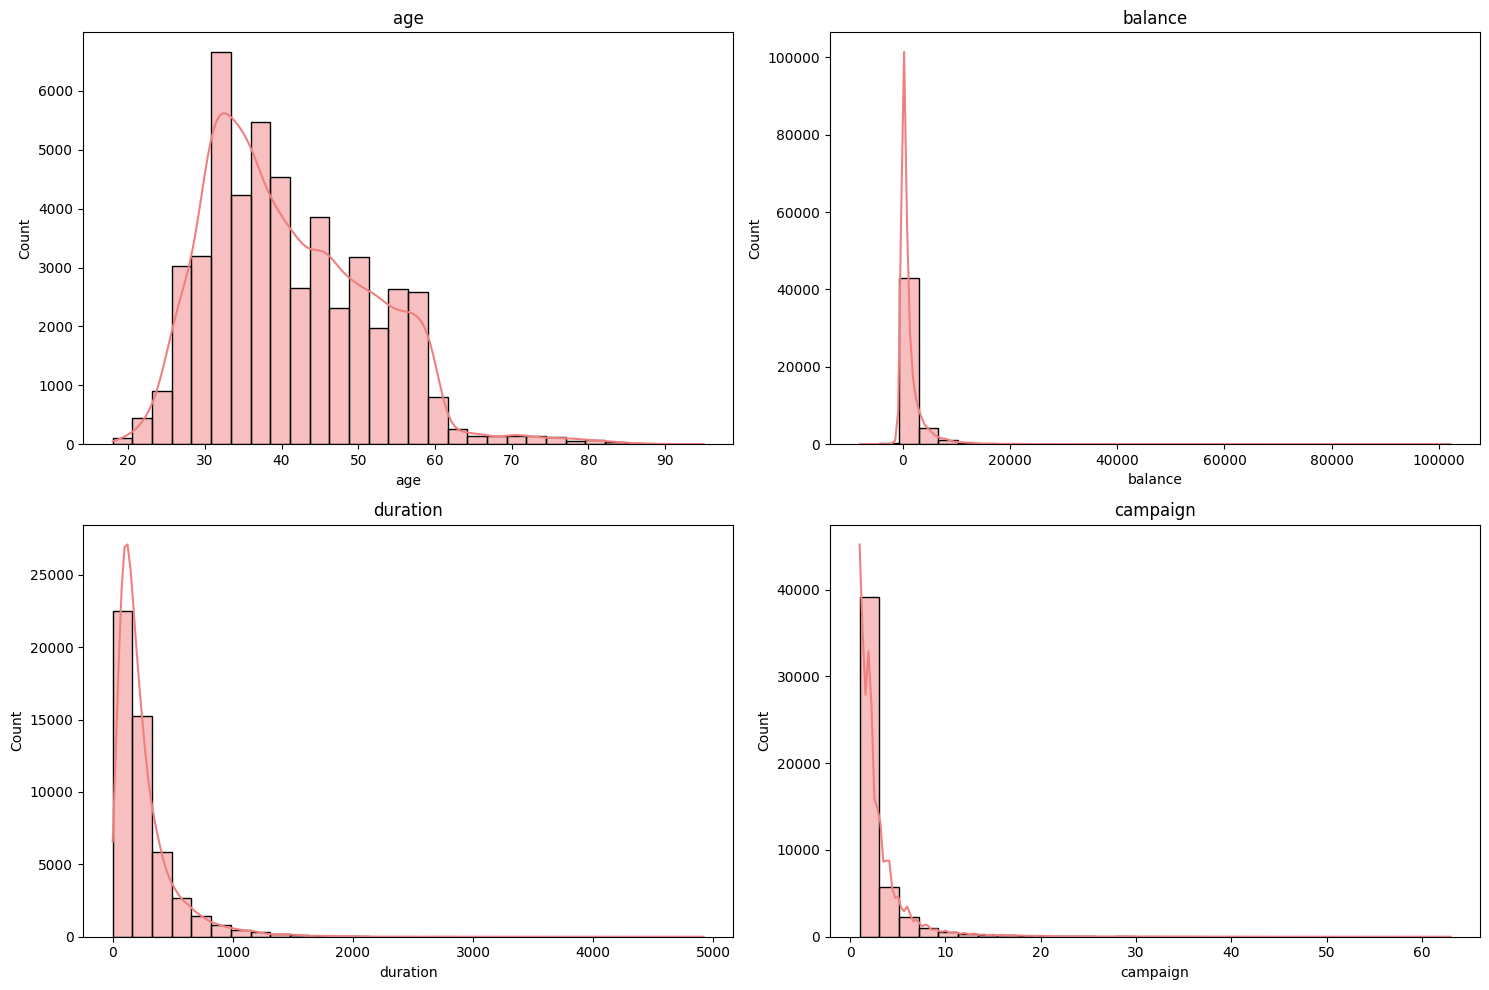

In [105]:
important_features = ['age', 'balance', 'duration', 'campaign']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

flat_axs = axs.flatten()

for i, feature in enumerate(important_features):
    sns.histplot(data=df, x=feature, ax=flat_axs[i], kde=True, bins=30, color='lightcoral')
    flat_axs[i].set_title(feature)
plt.tight_layout()
plt.show()


**StandardScaler and OneHotEncoding**

In [106]:
y = df["y"]
X = df.drop("y", axis=1)

In [107]:
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

In [108]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)])

preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous'],
      dtype='object')),
                                ('cat', OneHotEncoder(),
                                 Index(['job', 'marital', 'education', 'contact', 'month', 'poutcome'], dtype='object'))])

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((39785, 16), (9947, 16), (39785,), (9947,))

In [110]:
knn = KNeighborsClassifier(n_neighbors=10)
log_reg = LogisticRegression(max_iter=10000)


In [111]:
classifiers = {
    'K-Nearest Neighbors': knn,
    'Logistic Regression': log_reg
}

In [112]:
results = {}


In [113]:
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Compute metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    results[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results).T
print(results_df)

                     Precision    Recall  F1-Score  Accuracy  Time (s)
K-Nearest Neighbors   0.651822  0.279757  0.391489  0.899367  2.293416
Logistic Regression   0.664484  0.352737  0.460840  0.904494  0.949186


In [114]:
knn_params = {'classifier__n_neighbors': [3, 5, 7, 20, 30, 50, 100]}

log_reg_params = {'classifier__C': [0.1, 1, 10],}

parameters = {
    'K-Nearest Neighbors': knn_params,
    'Logistic Regression': log_reg_params}

tuned_results = {}

In [116]:
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Create GridSearchCV object
    grid = GridSearchCV(pipeline, parameters[name], cv=5)
    
    # Fit the model
    grid.fit(X_train, y_train)
    
    # Get the best estimator and predict
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Compute metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy=accuracy_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    tuned_results[name] = {
        'Best Params': grid.best_params_,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy':accuracy,
        'Time (s)': elapsed_time
    }

In [117]:
tuned_results_df = pd.DataFrame(tuned_results).T
print(tuned_results_df)

                                        Best Params Precision    Recall   
K-Nearest Neighbors  {'classifier__n_neighbors': 7}  0.618974  0.345786  \
Logistic Regression           {'classifier__C': 10}  0.665574  0.352737   

                     F1-Score  Accuracy   Time (s)  
K-Nearest Neighbors  0.443701  0.899668  73.219419  
Logistic Regression  0.461102  0.904594  11.433967  


Before tuning the KNN and logistic regression model, they both have similar performance.

In terms of **precision and recall**, Logistic regression performed a little bit better than KNN. As we are working on improving the churn rate for banks, we want to have a higher positive prediction, so that we can identify a higher number of true positives. 

In terms of **F1-score**, logistic regression again performs a higher score than KNN, which indicated that logistic regression will perform a better balance between precision and recall. 

The **accuracy** are very similar for both, therefore we may need to consider other factors to have a better decision.

**Time**: Logistic regression is much more faster than KNN and therefore contributed a lot more efficiency. 

Overall, Logistic regression should be a better choice than KNN in terms of almost all the performance metrics.

Ensemble modeling set up:

In [ ]:
dt = DecisionTreeClassifier(max_depth=20)
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
bag = BaggingClassifier()
voting = VotingClassifier(estimators=[('lr', log_reg), ('knn', knn), ('dt', dt)])

In [ ]:
classifiers_2nd = {
    'Decision Tree': dt,
    'Random Forest': rf,
    'AdaBoost': ada,
    'Bagging': bag,
    'Voting': voting
}

In [ ]:
dt_params = {'classifier__max_depth': [10,20,30,40,50]}
rf_params = {'classifier__n_estimators': [50, 100, 150], 'classifier__max_depth': [None, 10, 20, 30, 50]}
ada_params = {'classifier__n_estimators': [25, 50, 75]}
bag_params = {'classifier__n_estimators': [5, 10, 20]}
voting_params = {'classifier__voting': ['hard', 'soft']}

In [ ]:
params_dict_2nd = {
    'Decision Tree': dt_params,
    'Random Forest': rf_params,
    'AdaBoost': ada_params,
    'Bagging': bag_params,
    'Voting': voting_params
}

In [ ]:
for name, clf in classifiers_2nd.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Create GridSearchCV object
    grid = GridSearchCV(pipeline, params_dict_2nd[name], cv=5)
    
    # Fit the model
    grid.fit(X_train, y_train)
    
    # Get the best estimator and predict
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Compute metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    tuned_results[name] = {
        'Best Params': grid.best_params_,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy':accuracy,
        'Time (s)': elapsed_time
    }

In [ ]:
tuned_results_df = pd.DataFrame(tuned_results).T
print(tuned_results_df)

                                                           Best Params   
K-Nearest Neighbors                    {'classifier__n_neighbors': 17}  \
Logistic Regression                              {'classifier__C': 10}   
Decision Tree                            {'classifier__max_depth': 10}   
Random Forest        {'classifier__max_depth': None, 'classifier__n...   
AdaBoost                              {'classifier__n_estimators': 50}   
Bagging                               {'classifier__n_estimators': 20}   
Voting                                  {'classifier__voting': 'soft'}   

                    Precision    Recall  F1-Score  Accuracy    Time (s)  
K-Nearest Neighbors  0.660232  0.297133  0.409826  0.900975  213.198242  
Logistic Regression  0.665574  0.352737  0.461102  0.904594   19.049419  
Decision Tree             0.6  0.482189  0.534682  0.902885   13.145533  
Random Forest        0.740209  0.492615  0.591549  0.921283  376.895391  
AdaBoost             0.633282  0.3570

**Before going to questions:**

1. The Random Forest classifier has the highest accuracy and F1-score among all models. Even though it is the slowest one, it delivers the best overall performance.

2. Logistic Regression and decision tree have relatively shorter computaion time, but their performance is pretty close to random forest in terms of accuracy.

3. Even though voting classifier has the combination from logistic, knn and decision tree, its performance is falling betweeen these three, which suggest that it successfully combined the advantages of these three. 

4. Adaboost and bagging have overall good performance and bagging even defeat random forest in some aspects, which indicated that they are both well-tuned and efficient. 

5. Random forest and KNN had significantly longer computation time than other models. This might be due to their algorithm complexity and the demands of hyperparameter tuning. 

**QUESTIONs:**

**1. Why did the ensemble models perform the way they did?**

Random forest: it is the ensemble of decision tree and each of them is trained on a random subset of data to de-correlate the trees. Therefore it has the best performance, with a highest precision and accuracy, also good performance in most other factors. The only disadvantage is that it spends too much time, because building multiple trees will be expensive and time-consuming. 

AdaBosst: adaboost focus more on the misclassified instance from previous computation, and then puts more weight on them later. If there are noisy data being misclassified, the model's precision and recall will be affected. It will be dependent to data, so in our model it performs okay.

Bagging: bagging trains several models and the combine their predictions. Therefore the recall can be pretty high by reducing variance and overfitting. The accuracy and precision are also well-tuned for its combined prediction, whereas the time might be little longer.

Voting: The performance comes from different constituent models, if models make errors, voting classifier can balance. But the performance will fall between the performances of it models. Therefore in the result we had, precision/recall/f1/accuracy are all not so good. Time is dependent on complexity, and luckily it was better than others. 

**2. If you had to pick one model to implement in business process, which would it be and why?**

Because the ultimate goal is to improve the churn rate for business, I would like to choose the **RANDOM FOREST** model. Because it has the highest precision and performs really well in recall & f1-score & accuracy. 

The only problem is that random forest is very complex and requires a lot longer time to complete the computation, which means that if it is implemented in a real business, the computation cost would be increased. Also it may lead to potentioal operational delays in getting the model into production or decision-making process. 

In our model, bagging also performed great. However, random forest doesn't rely on any single feature for predictions, which means if some features are affected by noise, random forest can still perform well. On the other hand, bagging relies on bootstrap sampling to create training sets, which might be more sensitive to changes in data. 


**3. What decision criteria did you use to arrive at this conclusion?**

1. Performance metrics: Model's performance is the first thing to consider (precision, f1, recall, accuracy). These metrics help evaluate model's overall performance and balance in predicting true positives and avoiding false positives.

2. Computation time and efficiency: it's important to consider the computation time as it will affect the cost of business and potentially, the delivery time of the business model. Extended computation time will also require more RAM and therefore higher operational cost.

3. Model sensitivity/stability: we need to consider if the model is likely to overfit or being to sensitive to small variation of data.

